Histoire des sujets télévisés
===

## Données

Ce NoteBook utilise les données publiées par l'INA sur data.gouv.fr avec llassement thématique des sujets diffusés sur les journaux télévisés du soir de six chaînes (TF1, France 2, France 3, Canal +, Arte, M6) pour la période janvier 2005-juin 2015).


Les données peuvent être téléchargée sur [ce lien](https://www.data.gouv.fr/fr/datasets/classement-thematique-des-sujets-de-journaux-televises/)

Avant d'être lue dans ce NoteBook, elles ont été légèrement travaillée dans par le ficher python [clean.py](https://github.com/AlexisEidelman/journaux_televises/blob/gh-pages/clean.py) de ce répertoire.

## Contributions

Je ne prétends pas avoir l'analyse la plus pertinente du monde, si vous voulez enrichir le propos par des questions, du texte ou du code, tout est le bienvenu. Le plus simple pour moi est que vous utilisiez les "issues" de Github (voir [ce lien](https://github.com/AlexisEidelman/journaux_televises/issues))


In [1]:
# lecture des données
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
data = pd.read_csv('data/durees2.csv')
data.head()

,date,sujet,chaine,temps
0,2005-01-01,Catastrophes,TF1,20390.0
1,2005-01-01,Culture-loisirs,TF1,3022.0
2,2005-01-01,Economie,TF1,3145.0
3,2005-01-01,Education,TF1,1320.0
4,2005-01-01,Environnement,TF1,2700.0


# Les thèmes abordés

Depuis janvier 2005, les thèmes abordés ont été les suivants

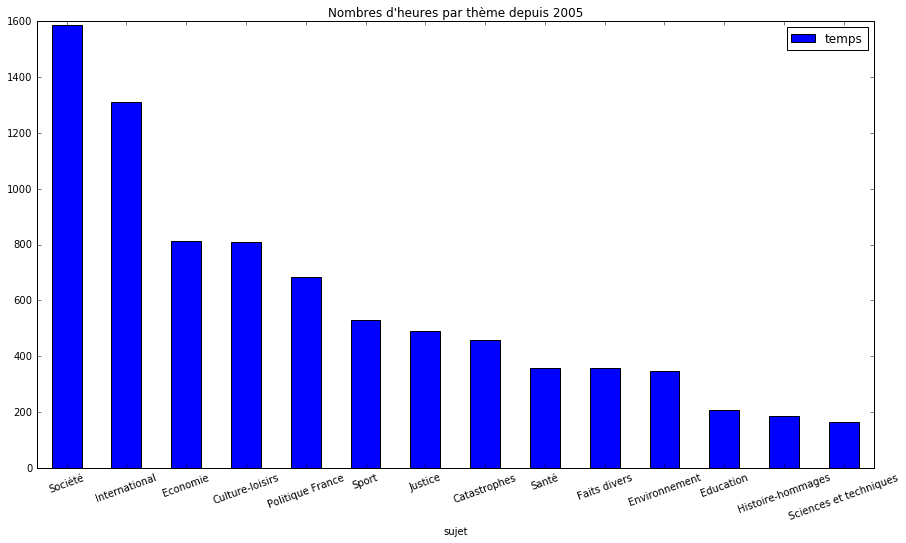

In [3]:
themes = data.groupby('sujet').sum() / 3600 # en heure
themes.sort_values(by='temps', ascending=False, inplace=True)

themes.plot(kind='bar', rot=20 ,title="Nombres d'heures par thème depuis 2005")


Les chaines abordent-elles les mêmes thèmes ?
====

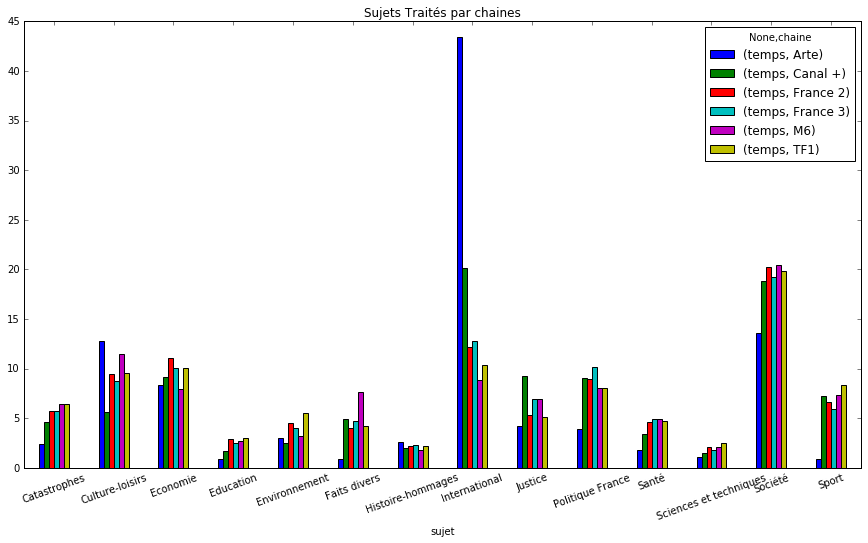

In [4]:
themes = data.groupby(['sujet','chaine']).sum() / 3600 # en heure
themes_par_chaine = themes.unstack()
themes_par_chaine = 100*themes_par_chaine/themes_par_chaine.sum()
themes_par_chaine.plot(kind='bar', rot=20 ,title="Sujets Traités par chaines")


## Première analyse : Arte une chaîne à part

On voit dans le graphique précédent que Arte consacre beaucoup plus de temps à l'international que les autres chaines 44% alors que les autres chaines sont autours de 10%. Canal+ se distingue aussi sur l'intérnationial en étant plus à 20% qu'à 10%.

Notons que quand Arte parle d'international ce n'est pas pour parler de sport puisqu'elle y consacre moins de 1% de son temps contre 6% pour les autres.

On peut retirer Arte pour mieux voir les différences entre les autres chaines.

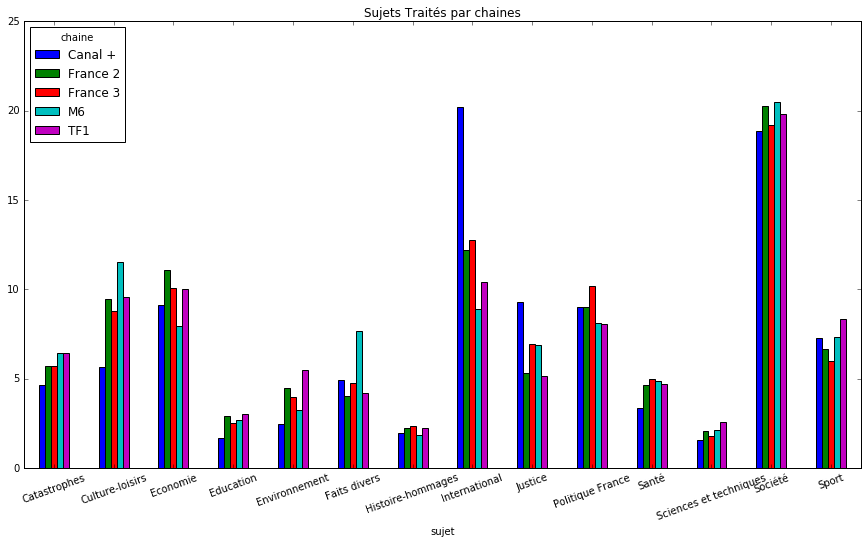

In [5]:
themes_par_chaine_sans_Arte = themes_par_chaine.copy()
themes_par_chaine_sans_Arte.columns = themes_par_chaine_sans_Arte.columns.droplevel()
del themes_par_chaine_sans_Arte['Arte']
themes_par_chaine_sans_Arte.plot(kind='bar', rot=20 ,title="Sujets traités par chaines")


## Deuxième analyse : M6 plus porté sur les faits divers mais des thèmes très homogènes entre les chaines

En dehors, d'un traitement privilégié de Canal+ pour l'international déjà évoqué, on note en premier la grande homogénéité des traitements.

A l'exception d'Arte qui traitent l'international, les chaînes traitent globalement les mêmes thèmes
===

Le temps de traitements par chaine
===

Toutes les chaines ne consacre pas le même temps à l'information comme le montre le graphique suivant

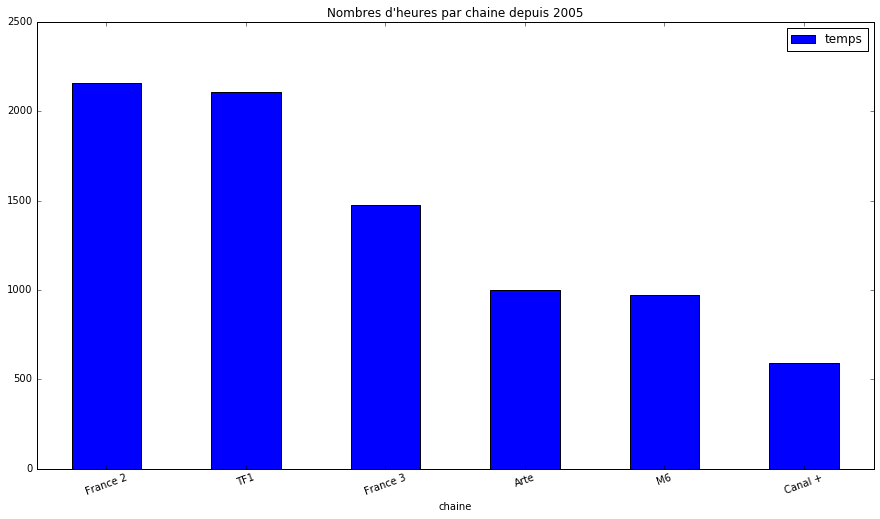

In [6]:
chaines = data.groupby('chaine').sum() / 3600 # en heure
chaines.sort_values(by='temps', ascending=False, inplace=True)

chaines.plot(kind='bar', rot=20 ,title="Nombres d'heures par chaine depuis 2005")

Probablement simplement lié à la durée des JT quotidiens et à leur régularité. Peu de chose à dire sur ce graphique.
Il y a 50 heures de différences entre France2 et TF1 qui accumulent près de 2150 heures sur 10 ans et 6 mois. Cela correspond à une moyenne de 34 minutes par jour.
Le calcul que j'ai effectué à la louche est : 2150 / 365*(10,5)

Regardons un peu si les durée moyennes sont constantes au cours du temps pour les chaines

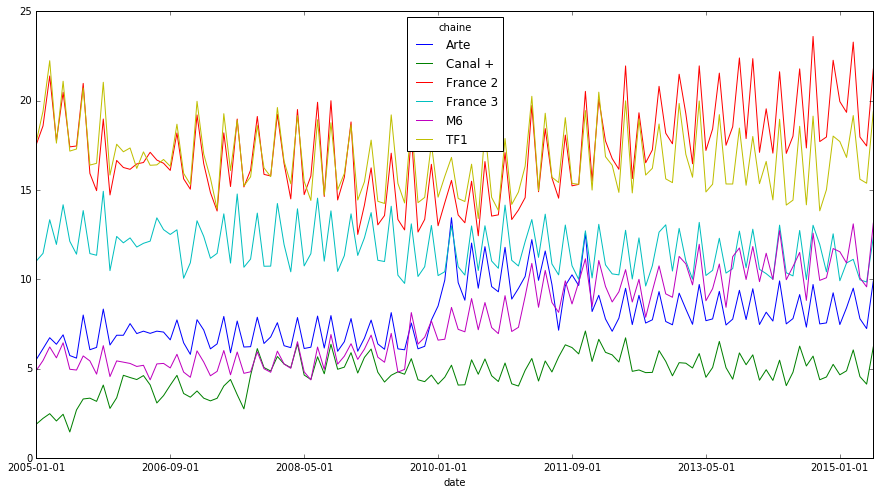

In [7]:
chaines_mois = data.groupby(['date','chaine']).sum() / 3600 # en heure
chaines_mois = chaines_mois.unstack()
chaines_mois.columns = chaines_mois.columns.droplevel()
chaines_mois.reset_index(inplace=True)
#chaines_heures.plot()

# ça bouge un peu, on peut corriger par le nombre de jour dans le mois
from calendar import monthrange
jour_mois = chaines_mois.date.apply(lambda x: monthrange(int(x[:4]), int(x[5:7]))[1])
chaines_mois.set_index('date', inplace=True)

chaines_mois = 365.25/12*chaines_mois.divide(jour_mois.values, axis=0)
chaines_mois.plot()
# ca ne sert à rien...mais bien pensé :)


## Une baisse de l'information jusqu'en 2010 et une augmentation sensible depuis

Ce résultat s'applique particulièrement à France2. C'est plus léger pour TF1. France3 est constant avec une très lègere tendance à la baisse. 
A l'inverse, M6 et Canal+ ont un part de plus en plus grande pour l'information en particulier M6 qui passe de 5 heures d'information entre 2005 et 2010 à environ 10 mensuelles depuis 2010.

Arte a encore une trajectoire originale avec un pic dans le volume d'information en 2010 qui se réduit à partir de 2012.

En dehors des tendances de fond, on voit que d'un mois à l'autre on a facilement 3 ou 4 heures d'informations en plus. Les pics et les creux sont communs à toutes les chaines. Est-ce que l'information agit sur toutes les chaines c'est probable mais cela demande confirmation.

La saisonnalité des thèmes
====

Montrer l'ensemble des 12 thèmes sur un même graphique est illisible. On regarde un premier graphique pour voir si certaines thèmes sont plus volatiles que d'autres.

L'ensemble des résultats qui suit ont été normalisé pour ne pas que les plus gros sujets (Société, International, ...) accaparent trop notre attention.

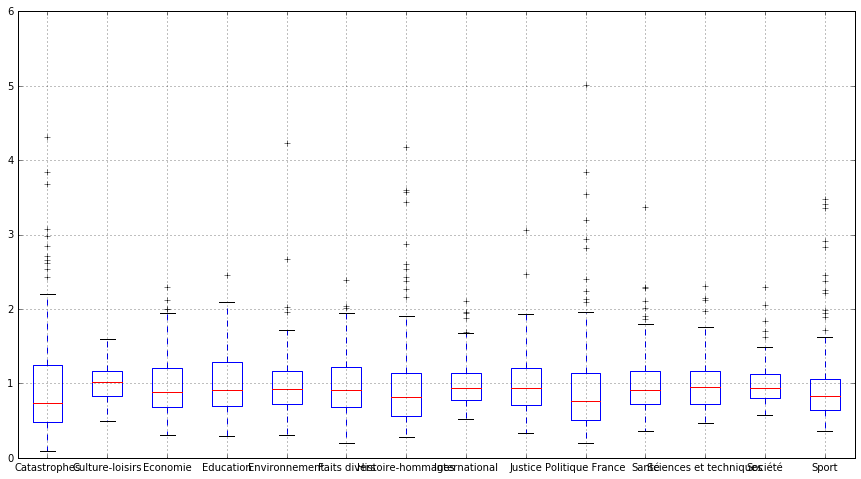

In [8]:
sujet_mois = data.groupby(['date','sujet']).sum() / 3600 # en heure
sujet_mois = sujet_mois.unstack()
sujet_mois.columns = sujet_mois.columns.droplevel()
sujet_mois.reset_index(inplace=True)
#sujet_mois.plot()

# ça bouge un peu, on peut corriger par le nombre de jour dans le mois
from calendar import monthrange
jour_mois = sujet_mois.date.apply(lambda x: monthrange(int(x[:4]), int(x[5:7]))[1])
sujet_mois.set_index('date', inplace=True)

sujet_mois = 365.25/12*sujet_mois.divide(jour_mois.values, axis=0)
sujet_mois = sujet_mois.divide(sujet_mois.mean(axis=0), axis=1)
sujet_mois.boxplot(return_type='axes')

On voit que certains thèmes ont une petite volatilité. Tandis que d'autres sujets sont traités du simple au triple en fonction de l'actualité. Nous allons regarder ces deux groupes sur deux graphiques disctincts.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea81141240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fea8049f470>], dtype=object)

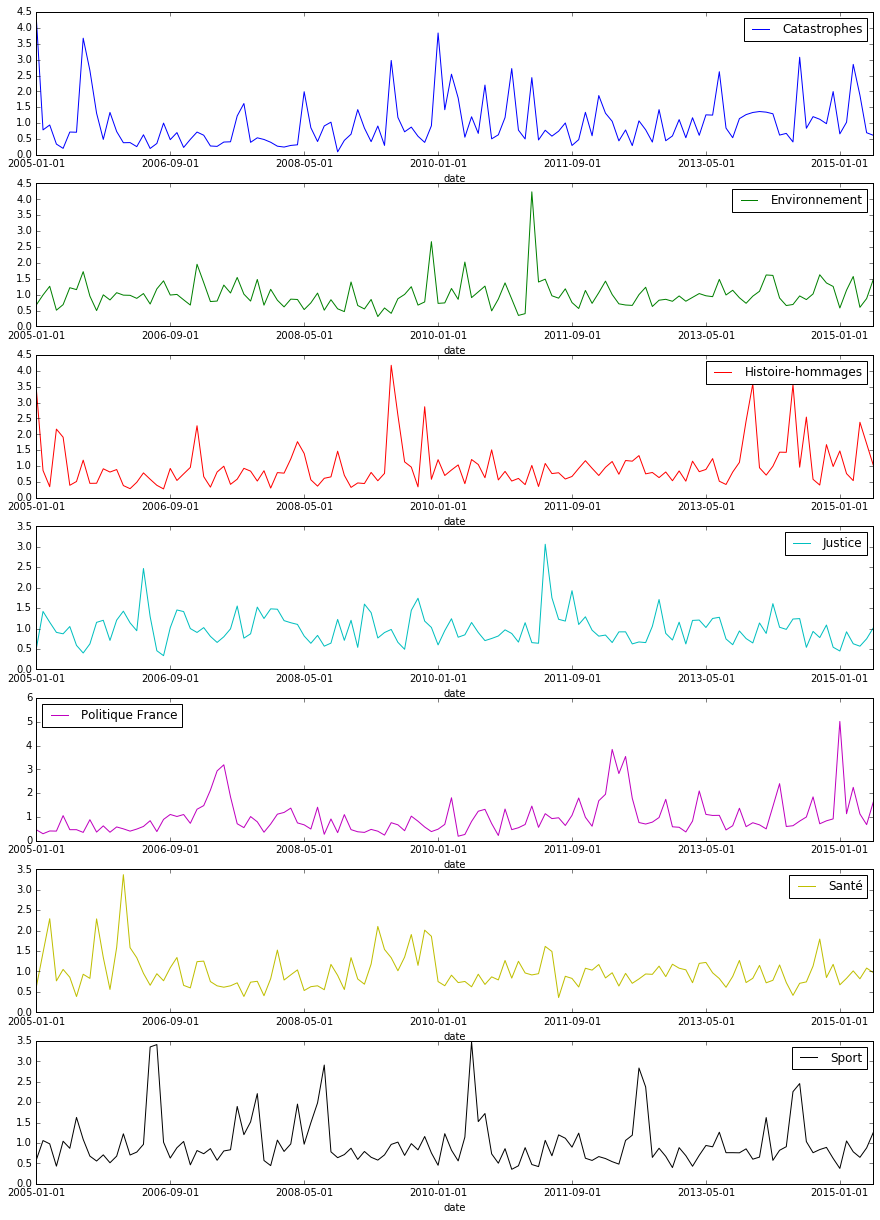

In [9]:
volatiles = sujet_mois.max() > 3
volatiles.sum()

matplotlib.rcParams['figure.figsize'] = (15.0, 7*3.0)
sujet_mois.loc[:,volatiles].plot(subplots=True, sharex=False)

# Grand jeu 

Sauras-tu retrouver l'actualité lié à chaque pic ? 

Pour le sport, on voit bien les jeux Olympique d'été (beaucoup beaucoup moins ceux d'hiver). En santé, a-t'on un pic médiator ? 
Je vous laisse jouer :)

Des données journalières permettraient d'affiner encore le jeu.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea80400048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fea80193b70>], dtype=object)

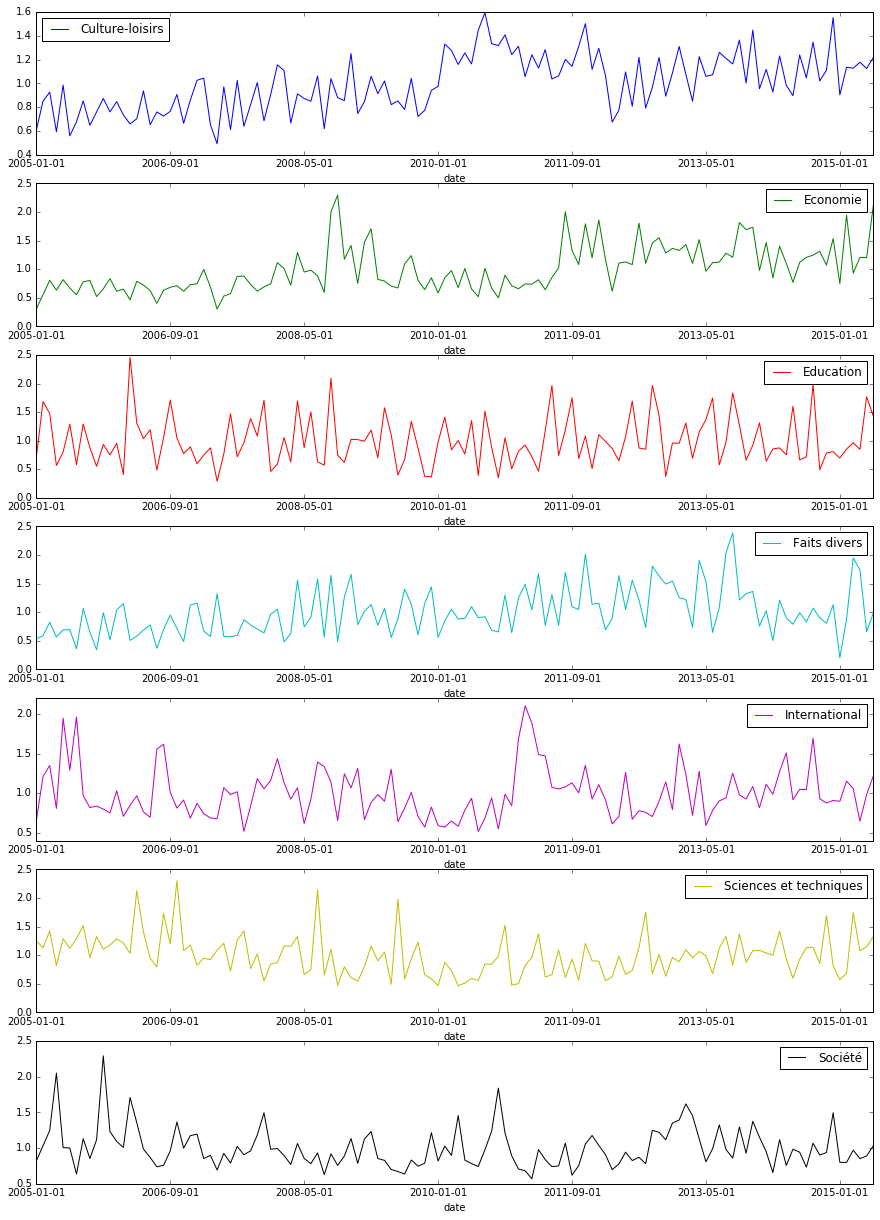

In [10]:
sujet_mois.loc[:,~volatiles].plot(subplots=True, sharex=False)

Remarquez bien l'échelle, les volotilités sont faibles. Pour le thème Culture-Loisir par exemple, on a vu que M6 parlait plus de ce thème que les autres et que la chaîne avait plus d'information à partir de 2010, c'est peut-être ce seul effet qui explique l'augmentation.

Pour aller plus loin, on pourrait étudier la corrélation entre les thèmes. Est-ce qu'on parle en même temps d'économie de Politique France ? 
Est-ce qu'on parle de Culture-Loisirs quand il n'y pas de sport ?